In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, confusion_matrix

In [3]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4443,2672-OJQZP,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.75,44.75,No
3875,2403-BCASL,Male,1,Yes,Yes,41,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,4534.9,Yes
4519,0103-CSITQ,Female,0,Yes,No,57,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.40,6252.7,No
509,1135-LMECX,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,19.85,No
181,6582-OIVSP,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.30,45.3,No


In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',None)
df["TotalCharges"] = df['TotalCharges'].astype('float64')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
gender = df[df['Churn']=='Yes']['gender'].value_counts()
print(gender.info)

sc = df[(df['SeniorCitizen']==1) & (df['Churn']=='Yes')]['gender'].value_counts()
print(sc.info)


<bound method Series.info of gender
Female    939
Male      930
Name: count, dtype: int64>
<bound method Series.info of gender
Female    240
Male      236
Name: count, dtype: int64>


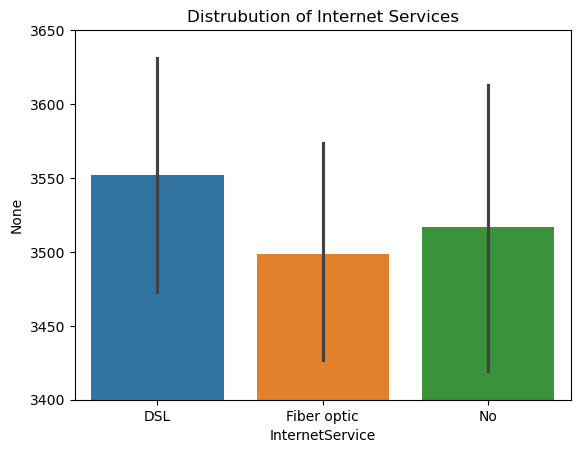

In [8]:
x = df['InternetService']
y = df["InternetService"].index

sns.barplot(x=x, y=y, hue=x).set_title('Distrubution of Internet Services')
plt.ylim(3400,3650)
plt.show()

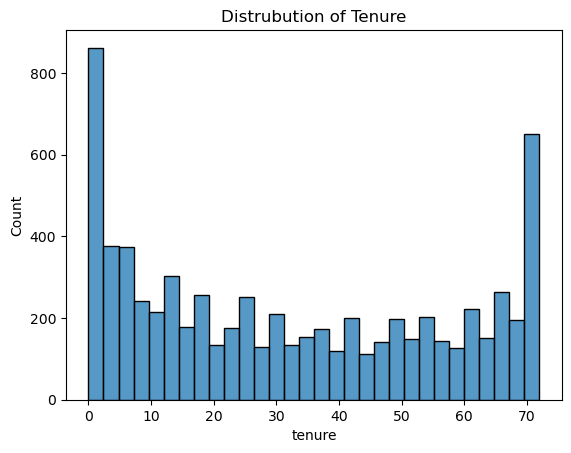

In [9]:
sns.histplot(df['tenure'], bins=30).set_title('Distrubution of Tenure')
plt.show()

In [10]:
df1 = df.loc[ :,['tenure', 'Contract']]
df1 = df1.groupby('Contract')['tenure'].sum()
df1.values

array([69892, 61932, 96166], dtype=int64)

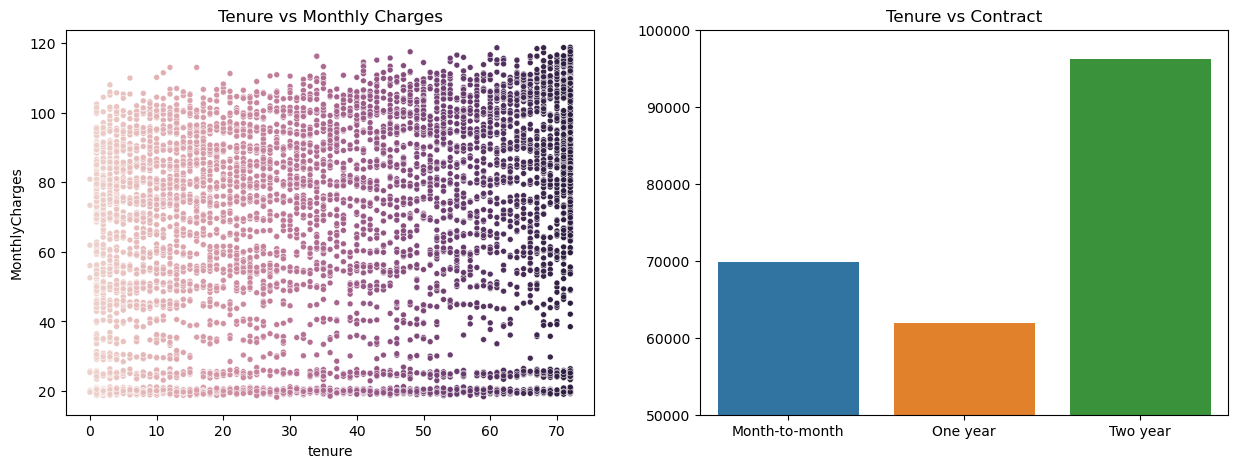

In [11]:
x = df['tenure']
y = df['MonthlyCharges']

f1, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x=x, y=y, hue=x,ax=ax1, legend=False, size=2).set_title('Tenure vs Monthly Charges')

x1 = df1.index.to_list()
y1 = df1.values.tolist()
sns.barplot(x=x1, y=y1,hue=x1, legend=False, ax=ax2).set_title('Tenure vs Contract')
plt.ylim(50000,100000)
plt.show()

In [ ]:
x= df['tenure'].to_numpy().reshape(-1,1)
y=df['MonthlyCharges'].to_numpy().reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=0) 

param_grid = {
    'fit_intercept': [True, False],
    'positive':[True, False],
    'copy_X':[True,False]
}

model1 = LinearRegression()
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, 
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

print(f"Best Parameters: {best_params}")
print(f'MSE :{mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {root_mean_squared_error(y_test, y_pred)}')
print(f'MAE : {mean_absolute_error(y_test, y_pred)}')

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
MSE :572.2951782168514
RMSE : 23.92269170091132
MAE : 18.94870619786966


In [ ]:
x= df['MonthlyCharges'].to_numpy().reshape(-1,1)
y=df['Churn'].to_numpy().reshape(-1,1).ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10, random_state=0) 

model2 = LogisticRegression()

model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(f'Accuracy :{round(accuracy_score(y_test, y_pred)*100,2)}%')

Accuracy :80.0%


In [61]:
x= df['tenure'].to_numpy().reshape(-1,1)
y=df['Churn'].to_numpy().reshape(-1,1).ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=15, random_state=0) 

model2 = LogisticRegression()

model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(f'Accuracy :{round(accuracy_score(y_test, y_pred)*100,2)}%')

Accuracy :86.66666666666667%


In [ ]:
x= df['MonthlyCharges'].to_numpy().reshape(-1,1)
y=df['Churn'].to_numpy().reshape(-1,1).ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=0) 

model3 = DecisionTreeClassifier()

model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

print(f'Accuracy :{round(accuracy_score(y_test, y_pred)*100,2)}%')

Accuracy :85.0%


In [73]:
x= df['MonthlyCharges'].to_numpy().reshape(-1,1)
y=df['Churn'].to_numpy().reshape(-1,1).ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=15, random_state=0) 

model4 = RandomForestClassifier()

model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(f'Accuracy :{round(accuracy_score(y_test, y_pred)*100,2)}%')

[[10  3]
 [ 1  1]]
Accuracy :73.33%
